# 1.	Univariate analysis

Variable names, Data types, description and range of values.

1.age	continuous	age of client	18 to 95

2.job	categorical	type of job 	admin. , blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown

3.marital	categorical	marital status of client	married, single, divorced

4.education	categorical	education	primary, secondary, teritary, unknown

5.default	categorical	has credit in default	yes, no

6.balance	continuous	balance of account	negative -8109 to 102127

7.housing	categorical	has housing loan 	yes, no

8.loan	categorical	has personal loan	yes, no

9.contact	categorical	contact communication type 	unknown, cellular, telephone

10.day	continuous	last contact day of month	1 to 31 days

11.month	categorical	last contact month of year 	Jan to Dec

12.duration	continuous	last contact duration, in seconds 	8 to 1471 seconds

13.campaign	continuous	number of contacts performed during this campaign and for this client	0 to 63 campaigns

14.pdays	continuous	number of days that passed by after the client was last contacted from a previous campaign 	days -1 to 871 

15.previous	continuous	number of contacts performed before this campaign and for this client 	0 to 275

16.poutcome	categorical	outcome of the previous marketing campaign 	unknown, other, failure, success

17.Target	categorical	client subscribes to term deposit	yes, no


In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Numerical libraries
import numpy as np   

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing test and train split from sklearn
from sklearn.model_selection import train_test_split

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score

# To standardize data.
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [2]:
#Load the file from local directory using pd.read_csv which is a special form of read_table

bank_df = pd.read_csv("bank-full.csv")

In [3]:
bank_df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_df.shape

(45211, 17)

In [6]:
bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


pdays min is -1.0. It cannot be -1 as it is number of days that passed by after the client was last contacted from a previous campaign. 

In [7]:
#replace -1 days with 0 .
bank_df['pdays'].values[bank_df['pdays'] == -1] = 0


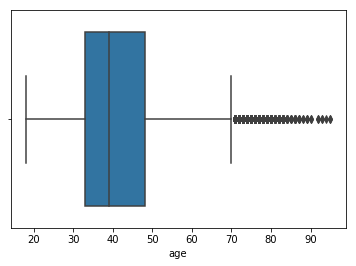

In [8]:
sns.boxplot( x='age', data = bank_df)

This distribution is slightly skewed towards left.

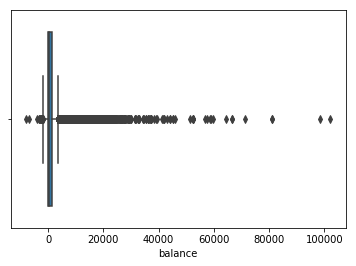

In [9]:
sns.boxplot(bank_df['balance'])

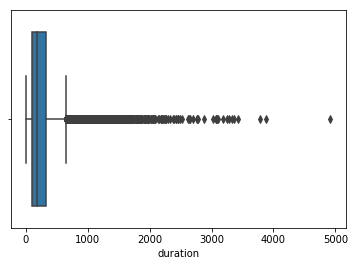

In [10]:
sns.boxplot(x='duration' , data = bank_df)

duration distribution is also skewed towards left. It has few extreme outliers which might impact the model performance.

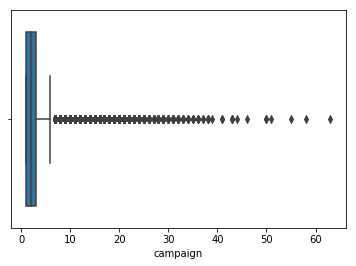

In [11]:
sns.boxplot(bank_df['campaign'])

Campaign distribution is also skewed towards left.

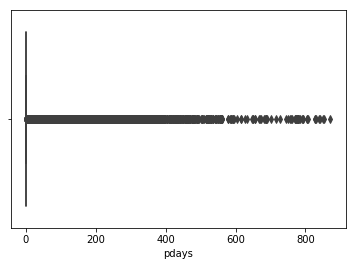

In [12]:
sns.boxplot(bank_df['pdays'])

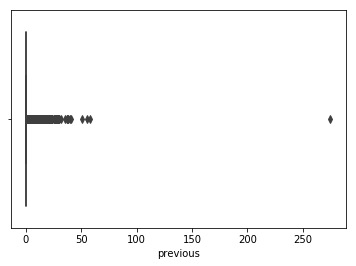

In [13]:
sns.boxplot(bank_df['previous'])

# Bivariate Analysis

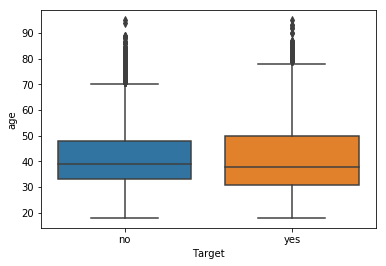

In [14]:
sns.boxplot(y='age', x='Target', data = bank_df)


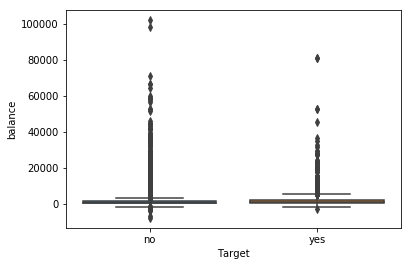

In [15]:
sns.boxplot(y='balance', x='Target', data = bank_df)

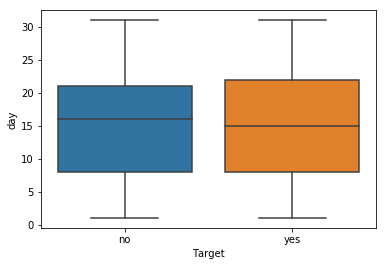

In [16]:
sns.boxplot(y='day', x='Target', data = bank_df)

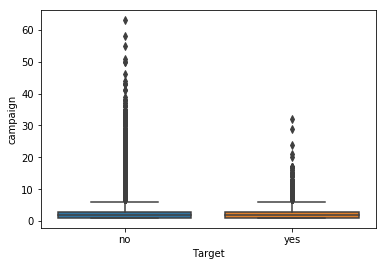

In [17]:
sns.boxplot(y='campaign', x='Target', data = bank_df)

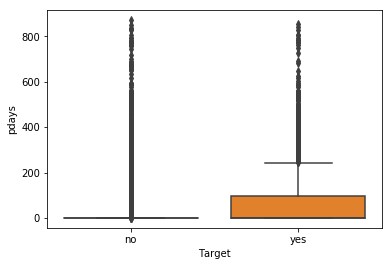

In [18]:
sns.boxplot(y='pdays', x='Target', data = bank_df)

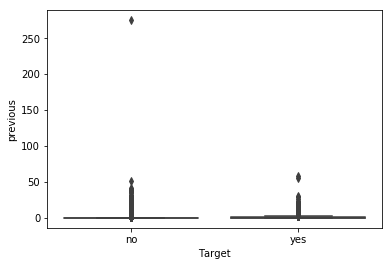

In [19]:
sns.boxplot(y='previous', x='Target', data = bank_df)

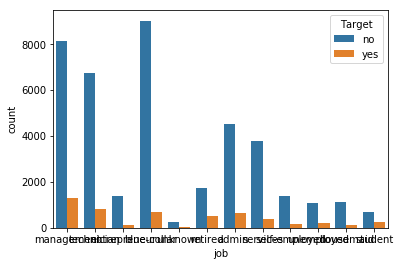

In [20]:
sns.countplot(x='job', hue ='Target', data = bank_df )

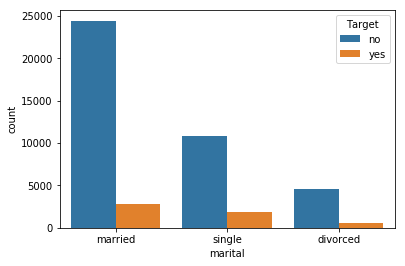

In [21]:
sns.countplot(x='marital', hue ='Target', data = bank_df )

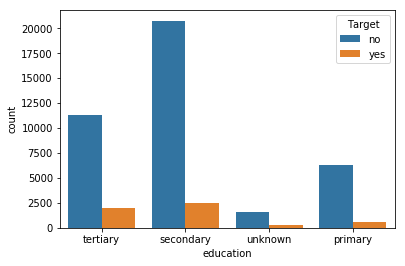

In [22]:
sns.countplot(x='education', hue = 'Target', data = bank_df )

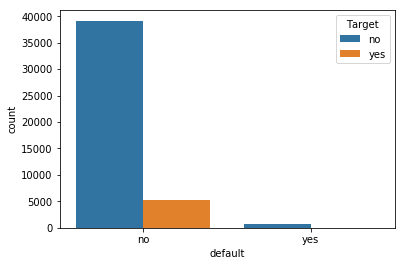

In [23]:
sns.countplot(x='default', hue='Target', data = bank_df)

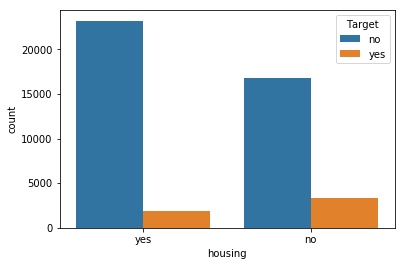

In [24]:
sns.countplot(x='housing', hue = 'Target', data = bank_df)

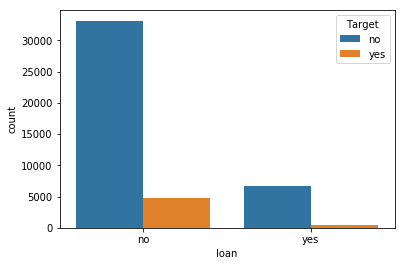

In [25]:
sns.countplot(x='loan', hue = 'Target', data = bank_df)

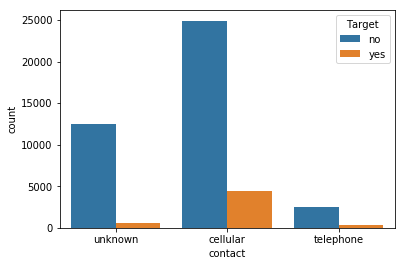

In [26]:
sns.countplot(x='contact', hue = 'Target', data = bank_df)

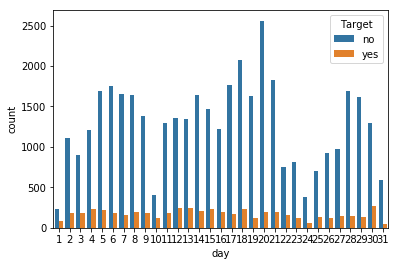

In [27]:
sns.countplot(x='day' , hue = 'Target', data = bank_df)

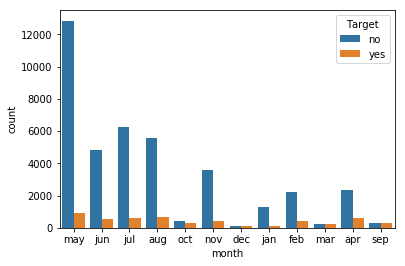

In [28]:
sns.countplot(x='month' ,hue = 'Target', data = bank_df)

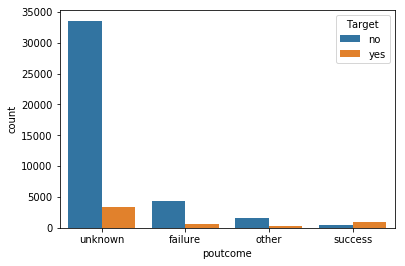

In [29]:
sns.countplot(x='poutcome', data=bank_df, hue='Target')

In [30]:
#unknown and other are similar - can be combined in this case
bank_df['poutcome'] = bank_df['poutcome'].replace(['other'] , 'unknown')

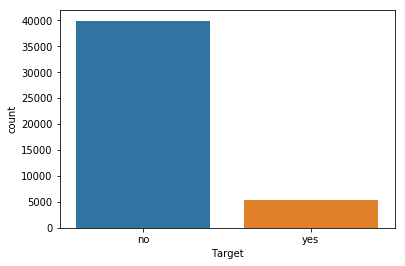

In [31]:
sns.countplot(x='Target', data=bank_df)

In [32]:
bank_df.groupby(["Target"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


Convert the categorical variables into numerical.

In [33]:
for feature in bank_df.columns: # Loop through all columns in the dataframe
    if bank_df[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank_df[feature] = pd.Categorical(bank_df[feature]).codes # Replace strings with an integer

bank_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


Check the correlation of the variables.

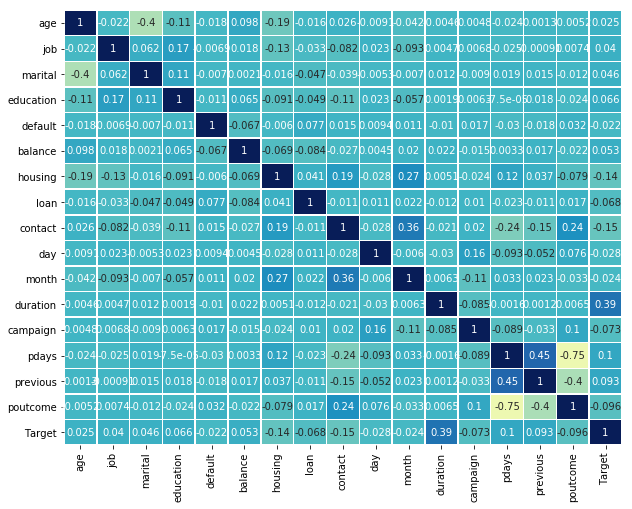

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(bank_df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [35]:
df = bank_df.drop("Target", axis = 1)
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
# scaled_df = scaler.fit_transform(df)
scaled_df = bank_df.drop('Target', axis = 1) #pd.DataFrame(scaled_df, columns=names)


In [36]:

X = scaled_df
y = bank_df["Target"]

test_size = 0.30 # taking 70:30 training and test set
seed = 6 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by the scale function.
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by the scale function.
  # Remove the CWD from sys.path while we load stuff.


In [37]:
#logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)

print(model.score(X_test_scaled, y_test))


0.8876437629017989


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
print(metrics.confusion_matrix(y_test, y_predict))


[[11691   248]
 [ 1276   349]]


In [39]:
# To model the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

#naive bayes
clf = GaussianNB()
clf.fit(X_train_scaled, y_train)
Y_pred = clf.predict(X_test_scaled)

print(clf.score(X_test_scaled, y_test))


0.8258625774107933


In [40]:
print(metrics.confusion_matrix(y_test, Y_pred))

[[10389  1550]
 [  812   813]]


In [41]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
dt_model.score(X_test_scaled , y_test)

0.8762901798879387

In [43]:
dt_model.score(X_train_scaled, y_train) 

1.0

Train set score is 1.0 - overfitting.

In [44]:
# set max depth and  min leaf 
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf=6 )
dt_model.fit(X_train_scaled, y_train)
y_pred = dt_model.predict(X_test_scaled)

In [45]:
dt_model.score(X_train_scaled, y_train)

0.906594621923089

In [46]:
dt_model.score(X_test_scaled , y_test)

0.8967856089649071

In [47]:
metrics.confusion_matrix(y_test,y_predict)

array([[11691,   248],
       [ 1276,   349]], dtype=int64)

In [48]:
metrics.recall_score(y_test,y_predict)

0.21476923076923077

In [49]:
metrics.precision_score(y_test,y_predict)

0.5845896147403685

Setting max depth and max leaf nodes helped reduce overfitting.

In [50]:
# In the following lines, we call the bagging classifer with oob_score (out of bag score) set to true which false by default

from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True)

bgcl = bgcl.fit(X_train_scaled , y_train)

y_predict = bgcl.predict(X_test_scaled)

print(bgcl.oob_score_)



0.903813947609568


In [51]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=50)

abcl = abcl.fit(X_train_scaled , y_train)


In [52]:
y_pred = abcl.predict(X_test_scaled)
abcl.score(X_test_scaled , y_test)


0.8876437629017989

In [53]:
abcl.score(X_train_scaled, y_train)

0.9714664897146649

In [54]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11355   584]
 [  940   685]]


In [55]:
#Gradient boosting with 50 estimators, max depth 5, learning rate 0.09
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 20, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train_scaled, y_train)

In [56]:
y_pred = gbcl.predict(X_test_scaled)
gbcl.score(X_test_scaled , y_test)

0.8977440283102329

In [57]:
gbcl.score(X_train_scaled, y_train)

0.9082693462255506

In [58]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11715   224]
 [ 1163   462]]


In [59]:
#Change number of estimators
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train_scaled, y_train)

In [60]:
y_pred = gbcl.predict(X_test_scaled)
gbcl.score(X_test_scaled , y_test)

0.9050427602477146

In [61]:
gbcl.score(X_train_scaled, y_train)

0.9260593421177363

In [62]:
print(metrics.confusion_matrix(y_test, y_pred))

[[11530   409]
 [  879   746]]


In [63]:
metrics.recall_score(y_test,y_pred)

0.4590769230769231

In [64]:
metrics.precision_score(y_test, y_pred)

0.6458874458874458

In [65]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, oob_score = True ,n_jobs =5,random_state =5 )
rfcl = rfcl.fit(X_train_scaled, y_train)

In [66]:
y_pred = rfcl.predict(X_test_scaled)
rfcl.score(X_test_scaled , y_test)

0.9003981126511353

In [67]:
rfcl.score(X_train_scaled, y_train)

0.999715612854299

This is overfitting too.

In [68]:
# gbcl error = incorrect predictions/ total predictions
error = (883    + 407) / (len(y_pred))  

In [69]:
print (error)

0.0951046888823356


In [70]:
## range : error +/- const * sqrt( (error * (1 - error)) / n)
const = 1.96 #for 95%
import math
var = const * math.sqrt((error * (1-error))/len(y_test))
print(var)


0.004936990759089654


In [71]:
classification_error_min = error - var
classification_error_max = error + var
print(classification_error_min)

0.09016769812324595


In [72]:
classification_error_max = error + var
print(classification_error_max)

0.10004167964142525


Range estimate at 95% confidence for the model performance in production :
[0.09,0.10] covers the classification error of the model on unseen data.